# 🎲 Monte Carlo Simulation for Hydrological Uncertainty

Welcome to this notebook on **Monte Carlo Simulation in Hydrology**. This notebook introduces how to model uncertainty using probabilistic simulations.

---

## 🎯 Learning Objectives
- Understand Monte Carlo simulation (MCS) and its role in uncertainty analysis
- Learn random sampling from probability distributions
- Propagate uncertainty through a hydrological model
- Visualize confidence intervals and risk bounds


## 📂 Step 1: Simulate Rainfall-Runoff Model
We simulate a simplified rainfall-runoff relationship with uncertain parameters.

We assume:
- Runoff (Q) = C × (Rainfall - Loss)
- `C` is a runoff coefficient (between 0.2–0.6)
- `Loss` is interception/infiltration (e.g. 5–15 mm)

Both `C` and `Loss` are uncertain and modeled using probability distributions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

# Fixed rainfall event (mm)
rainfall = 80

# Sample uncertain parameters
n_sim = 10000
C_samples = np.random.uniform(0.2, 0.6, n_sim)
Loss_samples = np.random.normal(10, 2, n_sim)  # mean=10, std=2

# Compute runoff
runoff = C_samples * np.maximum(0, rainfall - Loss_samples)

# Create DataFrame
df = pd.DataFrame({"Runoff": runoff})
df.head()

C:\Users\Zuhail\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Runoff
0,29.975778
1,33.477519
2,31.261694
3,29.344125
4,27.577578


## 📘 Step 2: Theory – What is Monte Carlo Simulation?
Monte Carlo simulation is a method for **quantifying uncertainty** by running a model many times with **random inputs** based on probability distributions.

Steps:
1. Define uncertain inputs using distributions (e.g., Normal, Uniform)
2. Sample randomly from these distributions
3. Run your model with sampled inputs
4. Repeat 1,000s of times
5. Analyze the distribution of model outputs (e.g., mean, confidence interval)


## 🔁 Step 3: Visualize Simulation Results
Plot the resulting distribution of runoff from the simulations.

C:\Users\Zuhail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


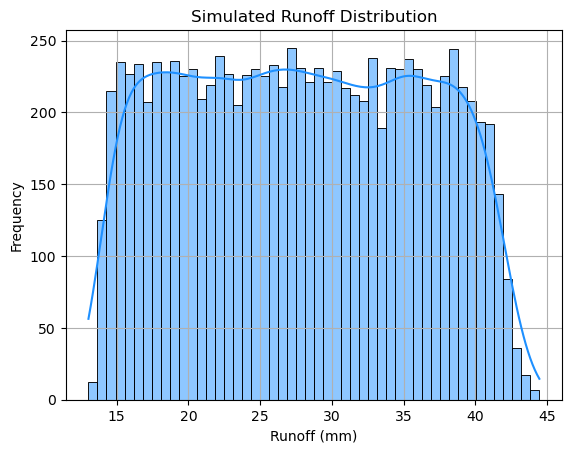

In [2]:
import seaborn as sns

sns.histplot(runoff, bins=50, kde=True, color='dodgerblue')
plt.title("Simulated Runoff Distribution")
plt.xlabel("Runoff (mm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## 📊 Step 4: Confidence Intervals and Summary Stats
Compute 5%, 50%, and 95% percentiles of runoff to create uncertainty bounds.

In [3]:
q5 = np.percentile(runoff, 5)
q50 = np.percentile(runoff, 50)
q95 = np.percentile(runoff, 95)

print(f"5th percentile: {q5:.2f} mm")
print(f"Median (50th): {q50:.2f} mm")
print(f"95th percentile: {q95:.2f} mm")

5th percentile: 15.29 mm
Median (50th): 27.81 mm
95th percentile: 40.62 mm


## 🧪 Step 5: Sensitivity Check
Change the variability of the loss distribution and re-run the simulation to see its effect.

C:\Users\Zuhail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Zuhail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


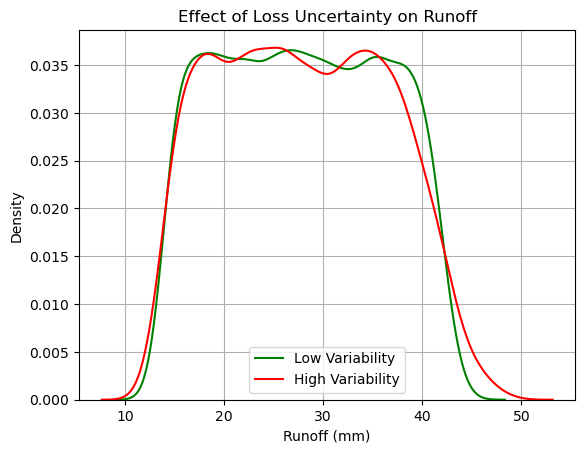

In [4]:
# Increase uncertainty in Loss
Loss_samples2 = np.random.normal(10, 5, n_sim)
runoff2 = C_samples * np.maximum(0, rainfall - Loss_samples2)

# Plot comparison
sns.kdeplot(runoff, label="Low Variability", color='green')
sns.kdeplot(runoff2, label="High Variability", color='red')
plt.title("Effect of Loss Uncertainty on Runoff")
plt.xlabel("Runoff (mm)")
plt.legend()
plt.grid(True)
plt.show()

## 🧠 Step 6: Practice Exercises
Try these exercises to reinforce your learning:

1. Change the rainfall to a variable (Normal or Gamma distributed) and simulate again.
2. Add a third uncertainty (e.g., evapotranspiration or soil storage).
3. Create a function that runs the MCS and returns mean + CI.
4. Plot the CDF of runoff using `np.sort()` and cumulative probabilities.

---

Monte Carlo simulation is a powerful tool to understand variability and risk in hydrological models.